# 目標
> ### 1. tomek link 後的資料 (767695 筆)，將前 20 高的 group 選出來
> ### 2. 並將它切成 train 跟 test，從此固定 test !!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time, math

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## 匯入資料 (使用做過 tomek link 後的資料)

In [2]:
path_ = r'C:\Users\e2414\OneDrive\桌面\專題\AllData\training'  
path_go = r'C:\Users\e2414\OneDrive\桌面\專題\AllData\training\20group'  

In [3]:
%%time
with open(path_+ r"/tomek_train.pkl", "rb") as f:
    train = pickle.load(f)
    
with open(path_+ r"/tomek_trainlabel.pkl", "rb") as f:
    trainlabel = pickle.load(f)
    
print(train.shape)
print(len(trainlabel))

(767695, 300)
767695
Wall time: 2.52 s


## 原資料各個表情 group 計數

In [5]:
label = list(range(1, 40+1))

In [6]:
%%time
original_group = [trainlabel.count(i) for i in label]
print(original_group)
print(f'共 {sum(original_group)} 筆資料')

[104113, 89587, 67211, 58707, 58258, 39529, 43140, 30902, 29995, 27503, 23541, 23846, 21360, 14193, 16383, 10691, 10652, 10946, 9156, 8636, 8430, 7448, 7179, 5664, 5255, 4482, 3988, 3805, 3608, 3580, 2463, 2293, 2037, 1604, 1505, 1423, 1228, 1234, 1120, 1000]
共 767695 筆資料
Wall time: 327 ms


Wall time: 303 ms


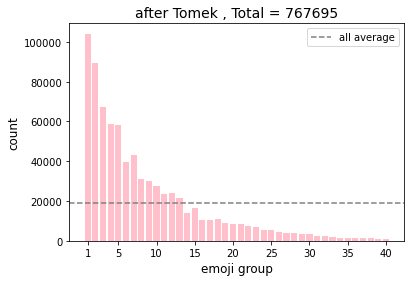

In [7]:
%%time
#fig= plt.figure(figsize= [16, 12])
plt.bar(label, original_group, color = 'pink')
plt.axhline(y=np.mean(original_group), c="gray", ls="--", lw=1.5, label = 'all average')
xlabel = [1]+ list(range(5, 40+1, 5))
plt.xticks(xlabel) 
plt.title(f'after Tomek , Total = {sum(original_group)}', size = 14)
plt.xlabel('emoji group', size = 12)
plt.ylabel('count', size = 12)
plt.legend()
plt.savefig(path_+ '/tomek.jpg')

## 前 20 group 的表情資料

In [8]:
newlabel = list(range(1, 20+1))
mean20 = np.mean(original_group[:20])
group20 = original_group[:20]
print(newlabel)
print(mean20)
print(group20)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
34917.45
[104113, 89587, 67211, 58707, 58258, 39529, 43140, 30902, 29995, 27503, 23541, 23846, 21360, 14193, 16383, 10691, 10652, 10946, 9156, 8636]


### 取出前 20 group 的 training 和 label，命名為 newtrain、newtrainlabel

In [9]:
%%time
newgroup_loc = [i for i,v in list(enumerate(trainlabel)) if v in newlabel]

newtrain = train[newgroup_loc, ]
newtrainlabel = [trainlabel[i] for i in newgroup_loc]

print(newtrain.shape)
print(len(newtrainlabel))

(698349, 300)
698349
Wall time: 863 ms


## 從此都使用 698349 筆資料 !

對照用，確定沒問題

In [10]:
%%time
#ori_20group = [newtrainlabel.count(i) for i in newlabel]
#print(ori_20group)
#print(f'共 {sum(ori_20group)} 筆資料')

Wall time: 0 ns


Wall time: 108 ms


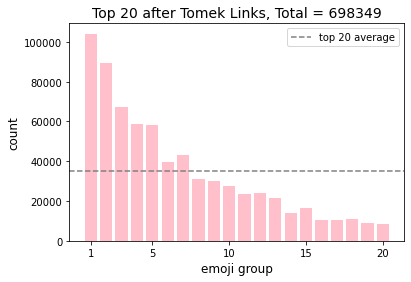

In [11]:
%%time
#fig= plt.figure(figsize= [16, 12])
plt.bar(newlabel, group20, color = 'pink')
plt.axhline(y=mean20, c="gray", ls="--", lw=1.5, label = 'top 20 average')

xlabel = [1]+ list(range(5, 20+1, 5))
plt.xticks(xlabel) 
plt.title(f'Top 20 after Tomek Links, Total = {sum(group20)}', size = 14)
plt.xlabel('emoji group', size = 12)
plt.ylabel('count', size = 12)
plt.legend()
plt.savefig(path_go+ r'/top20_beforesplit.jpg')

## 將前 20 group 匯出

In [12]:
%%time
with open(path_go+ '/20total.pkl','wb') as f:
    pickle.dump(newtrain, f)

with open(path_go+ '/20total_label.pkl','wb') as f:
    pickle.dump(newtrainlabel, f)

Wall time: 45.3 s


<hr>

## 將資料切成 train 與 test

In [20]:
%%time
X_train, X_test, y_train, y_test = train_test_split(newtrain, newtrainlabel, test_size=0.1, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(628514, 300)
(69835, 300)
628514
69835
Wall time: 19.6 s


In [21]:
train_count = [y_train.count(i) for i in newlabel]
test_count = [y_test.count(i) for i in newlabel]

print(train_count)
print(test_count)

[93632, 80919, 60450, 52893, 52371, 35655, 38727, 27715, 27017, 24801, 21164, 21436, 19182, 12807, 14768, 9589, 9608, 9817, 8211, 7752]
[10481, 8668, 6761, 5814, 5887, 3874, 4413, 3187, 2978, 2702, 2377, 2410, 2178, 1386, 1615, 1102, 1044, 1129, 945, 884]


### 匯出檔案

In [23]:
%%time
with open(path_go+ '/20train.pkl','wb') as f:
    pickle.dump(X_train, f)

with open(path_go+ '/20trainlabel.pkl','wb') as f:
    pickle.dump(y_train, f)
    
with open(path_go+ '/20test.pkl','wb') as f:
    pickle.dump(X_test, f)

with open(path_go+ '/20testlabel.pkl','wb') as f:
    pickle.dump(y_test, f)

Wall time: 30.1 s


## 切成 train 與 test 後，train 的分佈和數量 ( 共 628514 筆資料 )

In [28]:
%%time
group20_train = [y_train.count(i) for i in newlabel]
mean20_train = int(np.mean(group20_train))

print(group20_train)
print(f'共 {sum(group20_train)} 筆資料')
print(f'平均為 {mean20_train} 筆資料')

[93632, 80919, 60450, 52893, 52371, 35655, 38727, 27715, 27017, 24801, 21164, 21436, 19182, 12807, 14768, 9589, 9608, 9817, 8211, 7752]
共 628514 筆資料
平均為 31425 筆資料
Wall time: 135 ms


Wall time: 482 ms


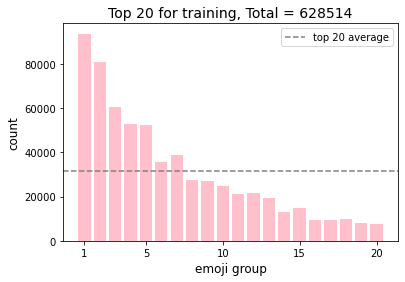

In [31]:
%%time
#fig= plt.figure(figsize= [16, 12])
plt.bar(newlabel, group20_train, color = 'pink')
plt.axhline(y=mean20_train, c="gray", ls="--", lw=1.5, label = 'top 20 average')

xlabel = [1]+ list(range(5, 20+1, 5))
plt.xticks(xlabel) 
plt.title(f'Top 20 for training, Total = {sum(group20_train)}', size = 14)
plt.xlabel('emoji group', size = 12)
plt.ylabel('count', size = 12)
plt.legend()
plt.savefig(path_go+ r'/top20_aftersplit.jpg')